In [1]:
%matplotlib inline


# Digital Image Basics





### our image backbone libraries

In [3]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage import data, io, color

### libraries generally good to have around

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import ipywidgets as widgets
import sys


In [4]:
# configure our data
pict1 = "france.jpg"

We can open an imagein PIL or Pillow (or opencv for that matter)

In [5]:
# 

#read the image
im = Image.open(pict1)
im.size

(730, 487)

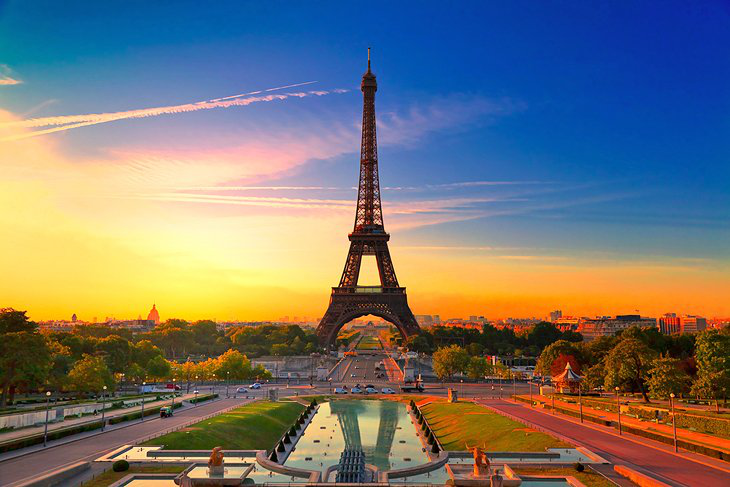

In [6]:
# do not rerun this ce
im

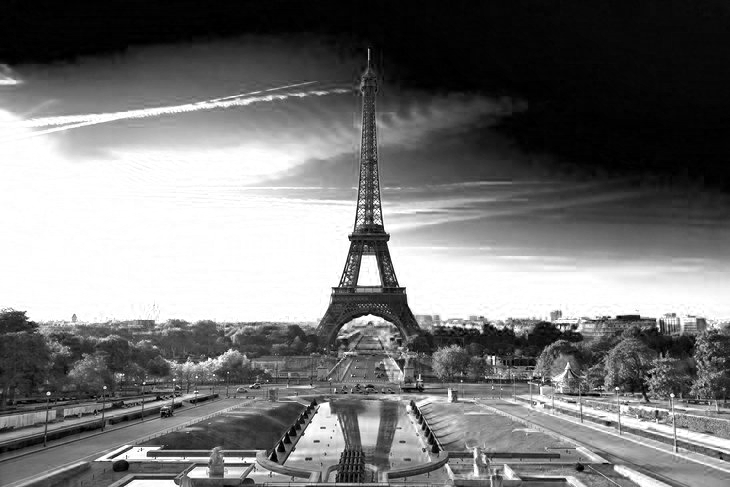

In [7]:
red, green, blue = im.split()
red

In [8]:
data = red, green, blue
data

(<PIL.Image.Image image mode=L size=730x487 at 0x1F52EAAC340>,
 <PIL.Image.Image image mode=L size=730x487 at 0x1F52EAAC3A0>,
 <PIL.Image.Image image mode=L size=730x487 at 0x1F52EAAC370>)

### This tutorial uses skimage mostly, so let's go with that

In [9]:
#from skimage import data, io, color
image_h = io.imread(pict1)

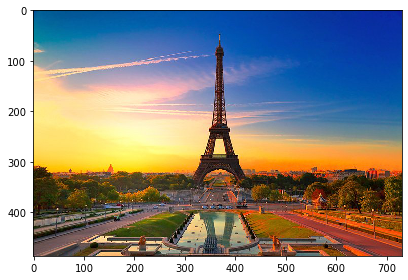

In [10]:
io.imshow(image_h)

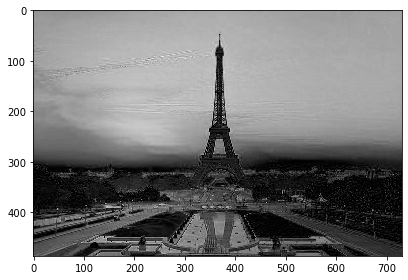

In [11]:
io.imshow(image_h[:, :,2] )  # [row, column, channel], [red, green, blue]

In [12]:
image_h.shape

(487, 730, 3)

In [13]:
image_h.size

1066530

In [16]:
mage_h = io.imread(pict1)
print(mage_h.shape,mage_h.min(), mage_h.max(), mage_h.mean())

(487, 730, 3) 0 255 116.5343365868752


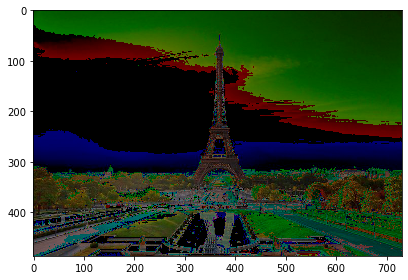

In [17]:
# masking
#lket's turn all the light values black, just because we can
mask = mage_h > 116
# Set black (0) the pixels where mask is True
mage_h[mask] = 0
io.imshow(mage_h)

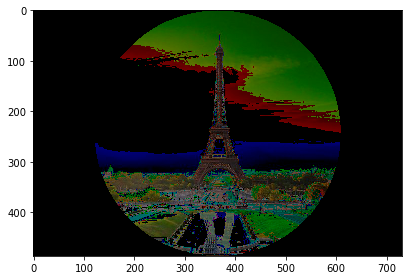

In [18]:
# Ok how about a geographic mask?
nrows, ncols, depth = image_h.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
#outer_disk_mask = 
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
mage_h[outer_disk_mask] = 0
io.imshow(mage_h)


We can also mask in color. Let's go step by step, first showing where the colors are

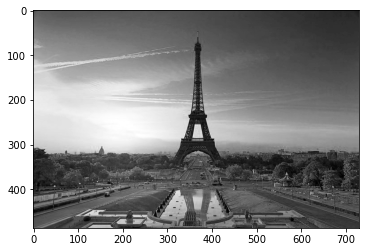

In [19]:
mage_h = io.imread(pict1)
plt.imshow(mage_h[:,:,1], cmap='gray')

[Text(0.5, 1.0, 'all layers')]

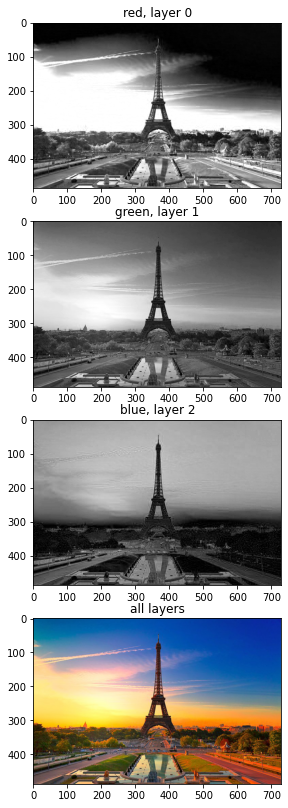

In [20]:
#mage_h = io.imread(pict1)
fig, (ax_1,ax_2,ax_3, ax_4) = plt.subplots(nrows = 4, figsize=(6, 14))
ax_1.imshow(mage_h[:,:,0], cmap='gray')
ax_1.set(title='red, layer 0')
ax_2.imshow(mage_h[:,:,1], cmap='gray')
ax_2.set(title='green, layer 1')
ax_3.imshow(mage_h[:,:,2], cmap='gray')
ax_3.set(title='blue, layer 2')
ax_4.imshow(mage_h[:,:,:],cmap='gray')
ax_4.set(title='all layers')

Now let;s see where red is hot

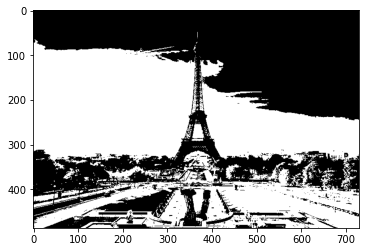

In [21]:
reddish = mage_h[:, :, 0] > 100
plt.imshow(reddish, cmap ='gray')

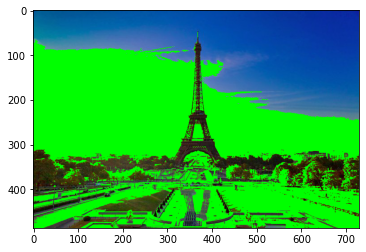

In [22]:
# let's make red green to be fair and share the burdem
mage_h[reddish] = [0, 255, 0]
plt.imshow(mage_h)

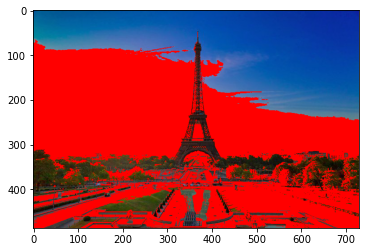

In [23]:
# nah, let a red be a red
mage_h = io.imread(pict1)
reddish = mage_h[:, :, 0] > 100
mage_h[reddish] = [255, 0, 0]
plt.imshow(mage_h)

Fundamentally, you now need to understand digital images as matrices, or stacked matrices or an multidimension array... and whatever library you use you will be fine. 
By the way numpy as a way to have these arrays has it's advantages

In [38]:
 np.lookfor('boundaries', 'skimage') 

Search results for 'boundaries'
-------------------------------
skimage.segmentation.find_boundaries
    Return bool array where boundaries between labeled regions are True.
skimage.segmentation.mark_boundaries
    Return image with boundaries between labeled regions highlighted.
skimage.future.graph.rag_boundary
    Comouter RAG based on region boundaries
skimage.segmentation.boundaries._find_boundaries_subpixel
    Notes
skimage.filters.sato
    Filter an image with the Sato tubeness filter.
skimage.util.montage
    Create a montage of several single- or multichannel images.
skimage.filters.frangi
    Filter an image with the Frangi vesselness filter.
skimage.transform.warp
    Warp an image according to a given coordinate transformation.
skimage.filters.hessian
    Filter an image with the Hybrid Hessian filter.
skimage.transform.swirl
    Perform a swirl transformation.
skimage.filters.gaussian
    Multi-dimensional Gaussian filter.
skimage.transform.resize
    Resize image to matc

Remeber it's all just a big numpy array...
sometimes you might want to transform it

Function names:
	Description

img_as_float
	Convert to floating point (integer types become 64-bit floats)

img_as_ubyte
	Convert to 8-bit uint.

img_as_uint
	Convert to 16-bit uint.

img_as_int
	Convert to 16-bit int.

In [24]:
# example
mage_h = io.imread(pict1)
mage_h

array([[[  2,  74, 148],
        [  2,  74, 148],
        [  2,  76, 147],
        ...,
        [ 14,  29, 158],
        [ 12,  27, 156],
        [ 12,  27, 156]],

       [[  3,  75, 149],
        [  2,  76, 149],
        [  3,  77, 148],
        ...,
        [ 15,  30, 159],
        [ 15,  30, 159],
        [ 15,  30, 159]],

       [[  4,  76, 150],
        [  3,  77, 150],
        [  4,  78, 149],
        ...,
        [ 15,  30, 159],
        [ 14,  29, 158],
        [ 14,  29, 158]],

       ...,

       [[ 94,  78,  88],
        [ 94,  77,  85],
        [ 95,  76,  82],
        ...,
        [140,  56,  46],
        [137,  55,  44],
        [135,  55,  46]],

       [[ 87,  71,  81],
        [ 93,  76,  84],
        [103,  82,  89],
        ...,
        [140,  56,  46],
        [139,  57,  46],
        [139,  56,  48]],

       [[ 99,  82,  92],
        [111,  91, 100],
        [126, 103, 111],
        ...,
        [142,  55,  46],
        [139,  55,  45],
        [139,  54,  47]]

SO we see dtype here, but we could also check

In [25]:
mage_h.dtype

dtype('uint8')

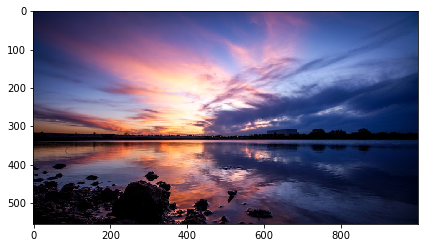

In [29]:
from skimage.util import img_as_ubyte
res_h = io.imread("hi_res.jpg")
res_h.dtype
# less_info = img_as_ubyte(mage_h)
io.imshow(res_h)


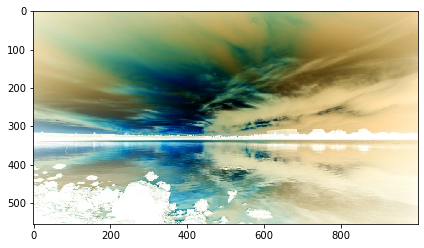

In [31]:
from skimage import util

inverted_img = util.invert(res_h)
io.imshow(inverted_img)

In [6]:
 np.lookfor('denoise', 'skimage') 

Search results for 'denoise'
----------------------------
skimage.restoration.denoise_bilateral
    Denoise image using bilateral filter.
skimage.restoration.j_invariant._invariant_denoise
    Apply a J-invariant version of `denoise_function`.
skimage.restoration.j_invariant._calibrate_denoiser_search
    Return a parameter search history with losses for a denoise function.
skimage.restoration.denoise_wavelet
    Perform wavelet denoising on an image.
skimage.restoration.cycle_spin
    Cycle spinning (repeatedly apply func to shifted versions of x).
skimage.restoration.denoise_nl_means
    Perform non-local means denoising on 2-D or 3-D grayscale images, and
skimage.restoration.calibrate_denoiser
    Calibrate a denoising function and return optimal J-invariant version.
skimage.restoration.denoise_tv_bregman
    Perform total-variation denoising using split-Bregman optimization.
skimage.restoration.denoise_tv_chambolle
    Perform total-variation denoising on n-dimensional images.
skim

In [34]:
from skimage import exposure
hist = exposure.histogram(res_h)
hist

C:\Users\makeda\AppData\Local\Temp/ipykernel_13260/2870073911.py:2: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist = exposure.histogram(res_h)


(array([66915, 21298, 17359, 12840, 11969, 10004,  8816,  8073,  7331,
         7414,  7396,  7481,  7419,  7249,  7101,  7242,  7464,  7350,
         7149,  6734,  7032,  7488,  7806,  7785,  7527,  7321,  7338,
         7476,  7368,  7130,  7039,  7127,  7144,  7213,  7431,  7663,
         7866,  8016,  8297,  7902,  8063,  7762,  7527,  7517,  7695,
         7798,  8110,  8160,  8231,  8574,  8796,  9022,  8985,  8732,
         8807,  8941,  8988,  9159,  9135,  9393,  9086,  9082,  9660,
         9613,  9731,  9426,  9478,  9625,  9646,  9602,  9638,  9720,
         9942,  9934, 10109, 10167,  9971,  9988,  9645,  9555,  9428,
         9175,  9349,  8812,  8551,  8815,  8739,  8737,  8564,  8653,
         8470,  8447,  8311,  8283,  8374,  8385,  8569,  8407,  8226,
         8116,  8404,  8098,  8048,  8123,  8083,  8129,  8113,  7915,
         7887,  7657,  7594,  7440,  7492,  7365,  7286,  7451,  7289,
         7139,  7085,  7247,  7198,  6993,  6792,  6894,  6807,  6656,
      

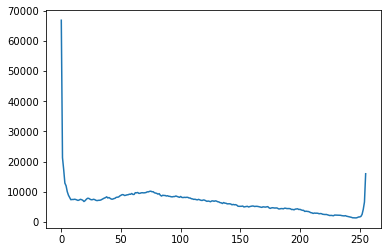

In [36]:
plt.plot(hist[1],hist[0])

# The histogram is the basis for a lot of manipulations....
In skikmage.exposure we can use rescale intensity though

# For rescaling go straight into the documentation here:
https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html#cropping-resizing-and-rescaling-images

# Getting fancy?

Any geometrical transformation you can code, 

# More fancy, but automated?

Built in -feature detection
By the way feature detection of edges is one way to go for segmentation

# Going genius?

check out the denoising algorithms, then write your own
